# **1. Introduction to PyTorch**

# PyTorch Tensors

In [ ]:
import torch

In [ ]:
# 간단한 텐서 생성
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
i = torch.ones((5,3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\n different random tensor:')
print(r2)

# 시드값을 지정해줘서 r1 과 r3는 같은 출력결과가 나옴
torch.manual_seed(1729)
r3 = torch.rand(2,2 )
print('\nShould match r1:')
print(r3)

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

 different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [ ]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# r3 = r1 + r2
# 이거 하면 런타임 에러 날거임 shape이 다르니까

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [ ]:
r = (torch.rand(2,2)- 0.5) * 2
print('random matrix r : ')
print(r)

# 절대값
print('\nAbsolute value of r :')
print(torch.abs(r))

# 역행렬
print('\nInverse sine of r :')
print(torch.asin(r))

# 행렬식
print('\nDeterminant of r :')
print(torch.det(r))

# svd
print('\nSingular value decomposition of r :')
print(torch.svd(r))

# 평균과 표준편차
print('\mAverage and standard deviation of r :')
print(torch.std_mean(r))

# 최대값
print('\nMaximum value of r :')
print(torch.max(r))

random matrix r : 
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r :
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r :
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r :
tensor(-0.5703)

Singular value decomposition of r :
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))
\mAverage and standard deviation of r :
(tensor(0.7217), tensor(0.1247))

Maximum value of r :
tensor(0.9956)


# PyTorch Models

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

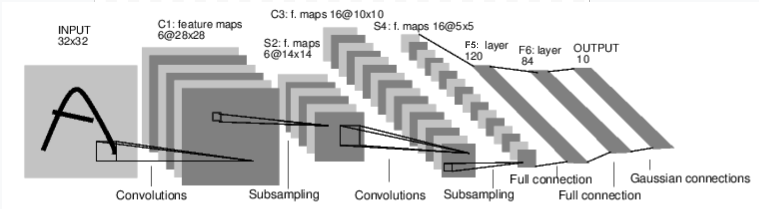

LeNet-5 예제
- C1 : 입력 이미지에서 특징을 감지하는 컨볼루션 레이어
- S2 : C1의 결과인 activation map을 Pooling (다운샘플링)
- C3 : 다시 한번 컨볼루션
- S4 : 다운샘플링
- F5, F6, output : fully connected 레이어로 마지막에 10개의 숫자중 하나로 분류


In [ ]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5) # 입력채널 1, 출력채널 6, 커널 크기 5 x 5
    self.conv2 = nn.Conv2d(6, 16, 5) # 입력널 6, 출력채널 16, 커널 크기 5 x 5

    # 16개 의 5 x 5 feature map -> 120개의 노드로
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 최종출력은 10개 클래스

  def forward(self, x):
    # (2,2) 랑 2 랑 같은 소리임 2 x 2 커널 사용하겠다는거
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2)) # C1 + S2
    x = F.max_pool2d(F.relu(self.conv2(x)), 2) # C3 + S4
    x = x.view(-1, self.num_flat_features(x)) # flatten
    x = F.relu(self.fc1(x)) # F5
    x = F.relu(self.fc2(x)) # F6
    x = self.fc3(x) # output
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
net = LeNet()
print(net)

# 랜덤한 이미지 생성
input = torch.rand(1, 1, 32, 32)
print('\nImage batch shape:')
print(input.shape)

# 출력 logits 형태
output = net(input)
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0167,  0.0464, -0.0936, -0.0117,  0.1029,  0.0762, -0.1275,  0.0577,
         -0.0028, -0.0824]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


# Datasets and Dataloaders

ToTensor() : 이미지 데이터를 PyTorch에서 사용할 수 있도록 텐서 형식으로 변환 시킴

Normalize(mean, std) : 정규화 과정 각 RGB 채널별로 평균을 빼고 표준편차로 나눠 데이터의 분포를 표준화 -> 딥러닝 학습을 더 빠르고 안정적으로 만들어줌.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

- root : 데이터를 저장할 폴더
- train = True : 학습 데이터를 불러옴 (False 는 테스트)
- download = True : 없으면 인터넷에서 자동 다운로드
- transform : 위에서 정의한 전처리 적용

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root = './data',
    train = True,
    download = True,
    transform = transform
)

100%|██████████| 170M/170M [00:03<00:00, 46.7MB/s]


- trainset : 위에서 불러온 데이터셋
- batch_size = 4 : 한번에 4개 샘플씩 가져옴
- shuffle = True : 매 epoch 마다 데이터를 섞음 (과적합 방지)
- num_workers = 2 : 데이터를 불러올 때 사용할 병렬 처리 워커 수

DataLoader 는 dataset에서 데이터를 꺼내 배치 단위로 정리


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

  dog plane truck truck


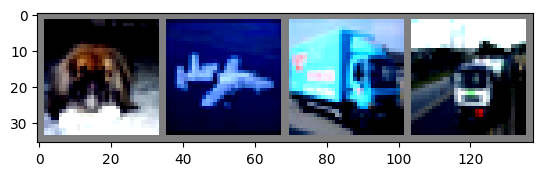

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 클래스 이름을 정의해줌
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5 # 정규화된 이미지를 원래되로 돌려봄
  npimg = img.numpy() # 넘파이 형식으로 변환
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader) # 데이터 배치를 순회하도록 이터레이터 생성
images, labels = next(dataiter) # next() : 첫번째 배치를 꺼냄 4개의 이미지와 라벨

imshow(torchvision.utils.make_grid(images)) # 4장 이미지를 하나로 붙여서 보여줌
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Training your PyTorch Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root = 'data',
    train = True,
    download = True,
    transform = transform)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True,
    num_workers = 2)

testset = torchvision.datasets.CIFAR10(
    root = 'data',
    train = False,
    download = True,
    transform = transform)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = True,
    num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plane horse   car   cat


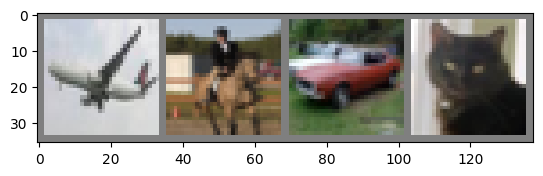

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # 3 채널 입력, 6 채널 출력, 5 x 5 커널
    self.pool = nn.MaxPool2d(2, 2) # 2 x 2 로 맥스풀링
    self.conv2 = nn.Conv2d(6, 16 ,5) # 6 채널 입력, 16채널 출력, 5 x 5 커널
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 1개의 클래스 예측

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad() # gradient 초기화

    outputs = net(inputs) # 모델 예측
    loss = criterion(outputs, labels) # 손실 계산
    loss.backward() # 백프랍 계산
    optimizer.step() # 파라미터 업데이트

    running_loss += loss.item()
    if i % 2000 == 1999: # 2000개 배치마다 출력
      print('[%d, %5d] loss: % 3f' %
            (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('훈련 끝')

[1,  2000] loss:  2.208257
[1,  4000] loss:  1.871340
[1,  6000] loss:  1.678698
[1,  8000] loss:  1.596801
[1, 10000] loss:  1.523696
[1, 12000] loss:  1.476263
[2,  2000] loss:  1.402311
[2,  4000] loss:  1.388129
[2,  6000] loss:  1.341344
[2,  8000] loss:  1.337208
[2, 10000] loss:  1.327022
[2, 12000] loss:  1.288677
훈련 끝


In [ ]:
correct = 0
total = 0
with torch.no_grad(): # gradient 비활성화 (inference 시에는 업데이트가 필요없으니까)
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %
